# Dilation and Erosion as Morphological Operations

In this notebook we would explore the dilation and erosion as morphological operations using the their [OpenCV](https://docs.opencv.org/3.4/db/df6/tutorial_erosion_dilatation.html) implementation. We'd also see some example use cases like reducing noise and repairing images using the combination of these operations. Following OpenCV function would be our reference to practice these operations. 

* [dilate](https://docs.opencv.org/3.4/d4/d86/group__imgproc__filter.html#ga4ff0f3318642c4f469d0e11f242f3b6c) - performs the dilation. Following parameters are relevant for our examples.
    * `src` - Source image. According to documentation, the number of channels could be arbitrary but the depth should be one of CV_8U, CV_16U, CV_16S, CV_32F or CV_64F. In this example we'd use binary source image.
    * `kernel` - Structuring element used for dilation; if element=Mat(), a 3 x 3 rectangular structuring element is used. Kernel can be created using [getStructuringElement](https://docs.opencv.org/3.4/d4/d86/group__imgproc__filter.html#gac342a1bb6eabf6f55c803b09268e36dc). However, we can also create our own kernel, which we'd see in our example.
    * `iterations` - Number of times dilation is to be applied.
* [erode](https://docs.opencv.org/3.4/d4/d86/group__imgproc__filter.html#gaeb1e0c1033e3f6b891a25d0511362aeb) - performs the erosion.
    * `src` - Source image. According to documentation, the number of channels could be arbitrary but the depth should be one of CV_8U, CV_16U, CV_16S, CV_32F or CV_64F. In this example we'd use binary source image.
    * `kernel` - Structuring element used for erosion; if element=Mat(), a 3 x 3 rectangular structuring element is used. Kernel can be created using [getStructuringElement](https://docs.opencv.org/3.4/d4/d86/group__imgproc__filter.html#gac342a1bb6eabf6f55c803b09268e36dc). However, we can also create our own kernel, which we'd see in our example.
    * `iterations` - Number of times erosion is to be applied.
* [morphologyEx](https://docs.opencv.org/3.4/d4/d86/group__imgproc__filter.html#ga67493776e3ad1a3df63883829375201f) - Performs advanced morphological transformations. Following parameters are most often relevant for this function.
    * `src` - Source image. According to documentation, the number of channels could be arbitrary but the depth should be one of CV_8U, CV_16U, CV_16S, CV_32F or CV_64F. In this example we'd use binary source image.
    * `op` - Type of the morphological operation, [MorphTypes](https://docs.opencv.org/3.4/d4/d86/group__imgproc__filter.html#ga7be549266bad7b2e6a04db49827f9f32).
    * `kernel` - Structuring element used for erosion; if element=Mat(), a 3 x 3 rectangular structuring element is used. Kernel can be created using [getStructuringElement](https://docs.opencv.org/3.4/d4/d86/group__imgproc__filter.html#gac342a1bb6eabf6f55c803b09268e36dc). We can also use our own kernel.

When [getStructuringElement](https://docs.opencv.org/3.4/d4/d86/group__imgproc__filter.html#gac342a1bb6eabf6f55c803b09268e36dc) is used to create the kernel, `shape` parameter is an integer, which takes one of the constants from [MorphShapes](https://docs.opencv.org/3.4/d4/d86/group__imgproc__filter.html#gac2db39b56866583a95a5680313c314ad). The parameter `ksize` is a tuple denoting the kernel size.

Let's try these operations with example images.

In [1]:
# Import necessary modules
import numpy as np
import cv2
import matplotlib.pyplot as plt

%matplotlib inline

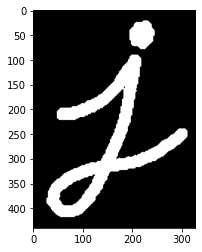

In [12]:
# Import image, make binary and visualize
img: np.ndarray = cv2.imread(filename='images/j.png', flags=cv2.IMREAD_GRAYSCALE)
_, img = cv2.threshold(src=img, thresh=100, maxval=255, type=cv2.THRESH_BINARY)
plt.imshow(img, cmap='gray');

## Using own kernel

In [13]:
# Perform dilation and erosion
kernel: np.ndarray = np.ones(shape=(5, 5), dtype=np.uint8)
dil: np.ndarray = cv2.dilate(src=img, kernel=kernel, iterations=2)
ero: np.ndarray = cv2.erode(src=img, kernel=kernel, iterations=2)

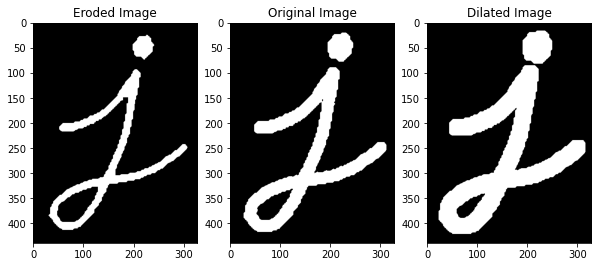

In [14]:
# Visualize transformed images
_, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(10, 10))
ax1.imshow(ero, cmap='gray')
ax1.set_title('Eroded Image')
ax2.imshow(img, cmap='gray')
ax2.set_title('Original Image')
ax3.imshow(dil, cmap='gray')
ax3.set_title('Dilated Image');

## Using (3, 3) OpenCV kernel

In [22]:
# Create (3, 3) rectangular kernel using the getStructuringElement
kernel: np.ndarray = cv2.getStructuringElement(shape=cv2.MORPH_RECT, ksize=(3,3))
dil: np.ndarray = cv2.dilate(src=img, kernel=kernel, iterations=2)
ero: np.ndarray = cv2.erode(src=img, kernel=kernel, iterations=2)

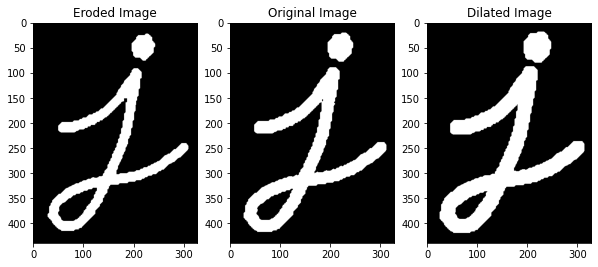

In [23]:
# Visualize transformed images
_, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(10, 10))
ax1.imshow(ero, cmap='gray')
ax1.set_title('Eroded Image')
ax2.imshow(img, cmap='gray')
ax2.set_title('Original Image')
ax3.imshow(dil, cmap='gray')
ax3.set_title('Dilated Image');

Now we'd see some examples of, how the combinations of the dilation and erosion operations can be used to reduce noise and perform minor repair of images.

## Opening

Opening is an use case, where erosion follows the dilation. It is usually performed to reduce noise from images. Erosion first removes the noise shrinking the object in the process. Then dilation enlarges the object again without affecting the noises, which were previously removed by the erosion. For our example we'd use `morphologyEx` function, where we can combine the erosion and dilation operation by specifying the operation as `cv2.MORPH_OPEN`.

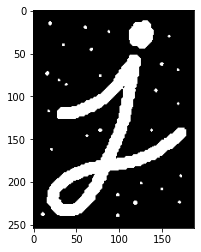

In [24]:
# Import image, make binary and visualize
img: np.ndarray = cv2.imread(filename='images/j_opening.png', flags=cv2.IMREAD_GRAYSCALE)
_, img = cv2.threshold(src=img, thresh=100, maxval=255, type=cv2.THRESH_BINARY)
plt.imshow(img, cmap='gray');

In [27]:
# Morphological transform
kernel: np.ndarray = cv2.getStructuringElement(shape=cv2.MORPH_RECT, ksize=(5,5))
img_opened: np.ndarray = cv2.morphologyEx(src=img, op=cv2.MORPH_OPEN, kernel=kernel)

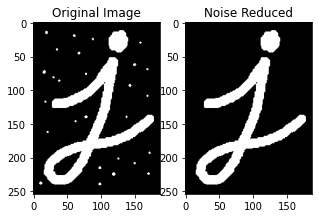

In [30]:
# Plot transformed image
_, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(5, 5))
ax1.imshow(img, cmap='gray')
ax1.set_title('Original Image')
ax2.imshow(img_opened, cmap='gray')
ax2.set_title('Noise Reduced');

## Closing

Closing is the reverse combination of Opening i.e., dilation followed by erosion. Closing can be used to repair the image e.g., in the following example we would use Closing to fill up small holes in the image. Once again, we'd use the `morphologyEx` function, this time specifying the operation as `cv2.MORPH_CLOSE`.

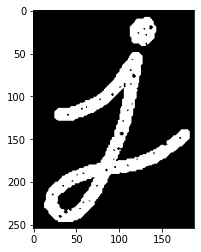

In [31]:
# Import image, make binary and visualize
img: np.ndarray = cv2.imread(filename='images/j_closing.png', flags=cv2.IMREAD_GRAYSCALE)
_, img = cv2.threshold(src=img, thresh=100, maxval=255, type=cv2.THRESH_BINARY)
plt.imshow(img, cmap='gray');

In [36]:
kernel: np.ndarray = cv2.getStructuringElement(shape=cv2.MORPH_RECT, ksize=(5,5))
img_closed: np.ndarray = cv2.morphologyEx(src=img, op=cv2.MORPH_CLOSE, kernel=kernel)

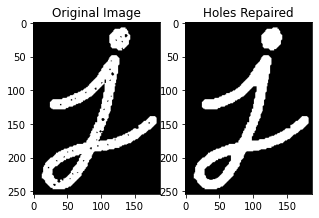

In [38]:
# Plot transformed image
_, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(5, 5))
ax1.imshow(img, cmap='gray')
ax1.set_title('Original Image')
ax2.imshow(img_closed, cmap='gray')
ax2.set_title('Holes Repaired');